In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("employee_data (1).csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


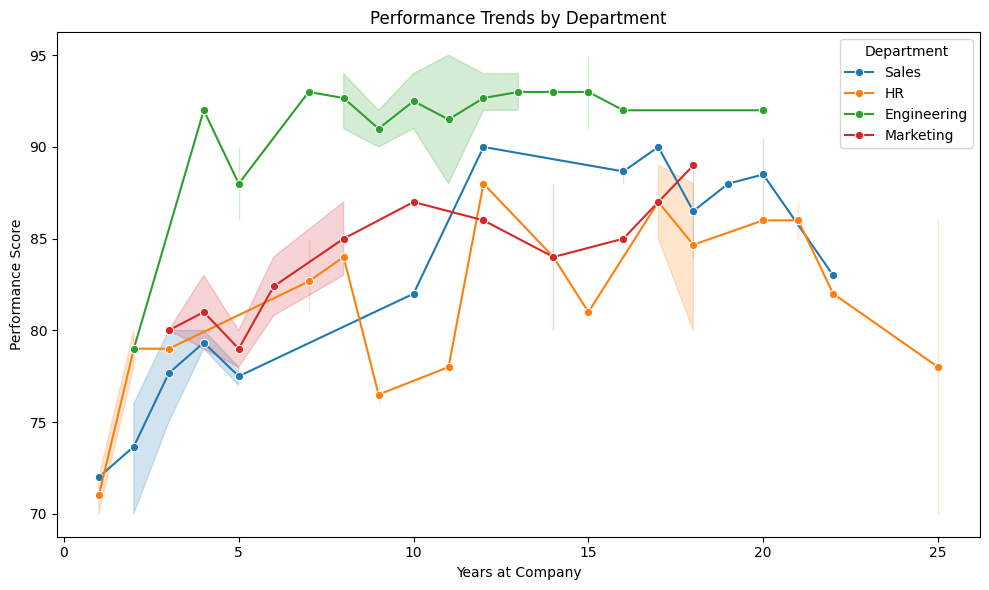

In [4]:
# Line plot: average performance over years at company
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="YearsAtCompany", y="PerformanceScore", hue="Department", marker="o")
plt.title("Performance Trends by Department")
plt.xlabel("Years at Company")
plt.ylabel("Performance Score")
plt.legend(title="Department")
plt.tight_layout()
plt.show()


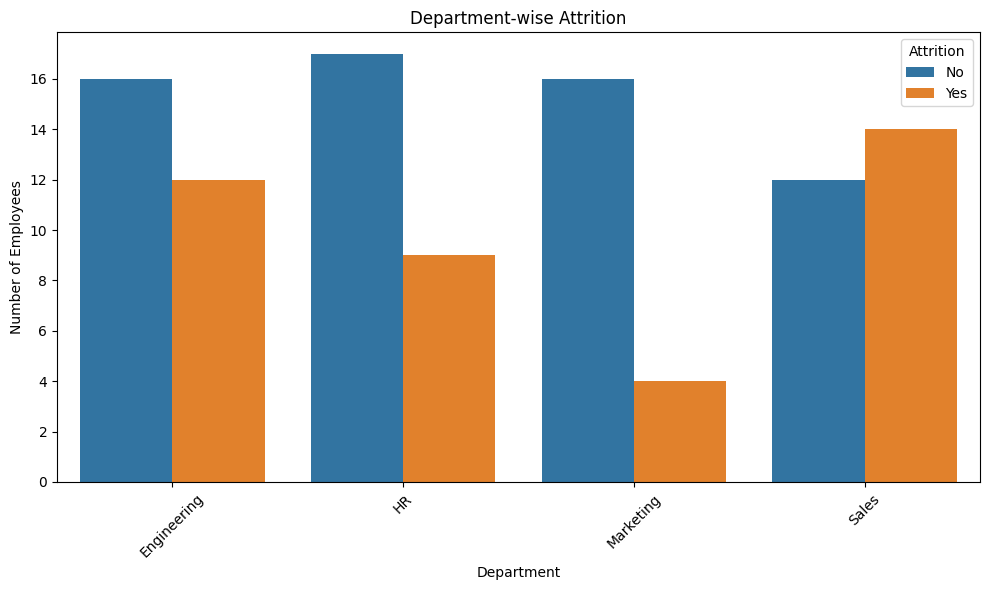

In [5]:
# Department wise attrition
plt.figure(figsize=(10, 6))
attrition_counts = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
sns.barplot(data=attrition_counts, x='Department', y='Count', hue='Attrition')
plt.title("Department-wise Attrition")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


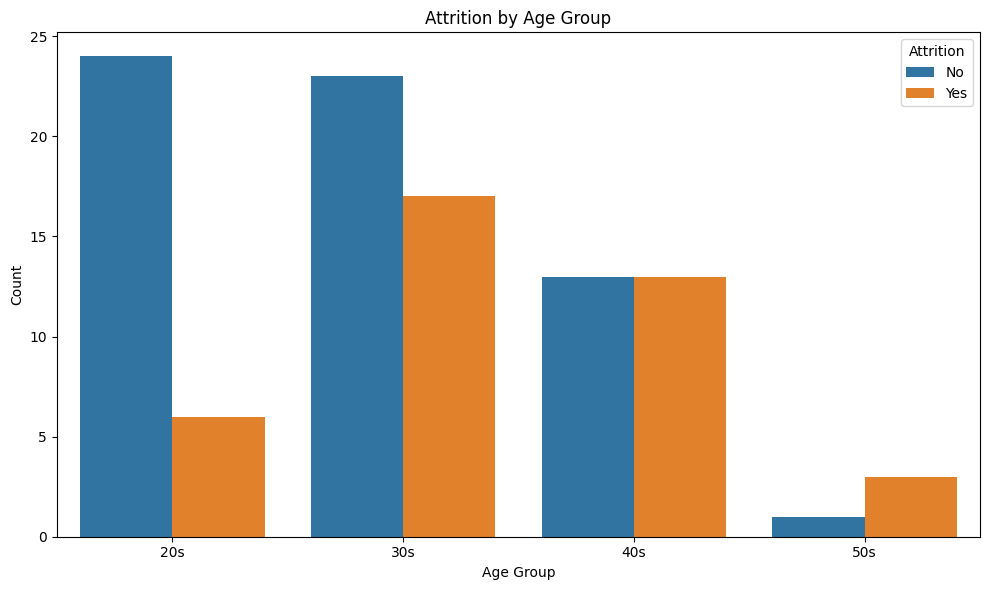

In [11]:
# Attrition Bhy age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=["20s", "30s", "40s", "50s"])
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="AgeGroup", hue="Attrition")
plt.title("Attrition by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


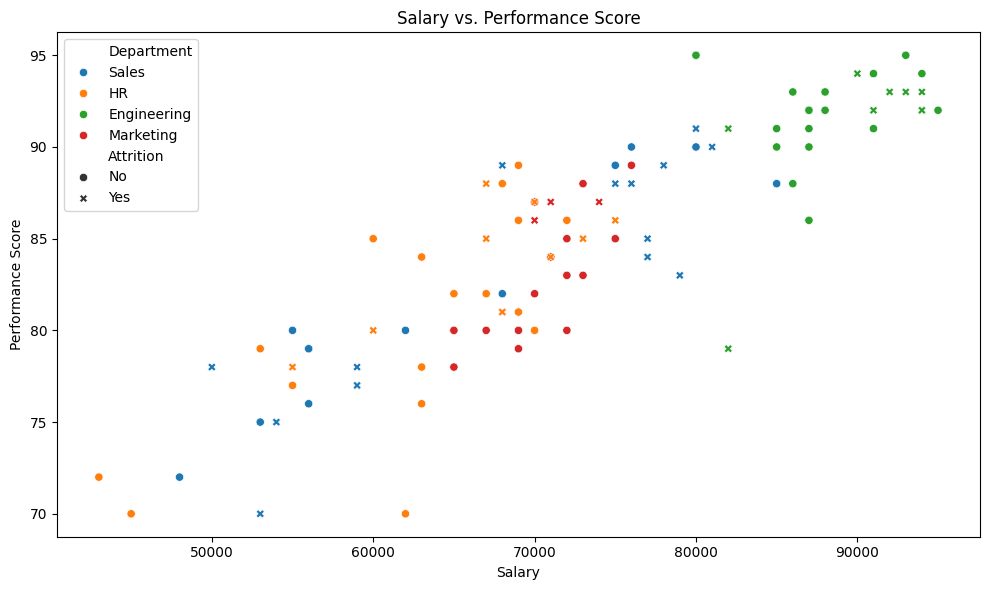

In [6]:
# Salary vs Performance score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Salary", y="PerformanceScore", hue="Department", style="Attrition")
plt.title("Salary vs. Performance Score")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()


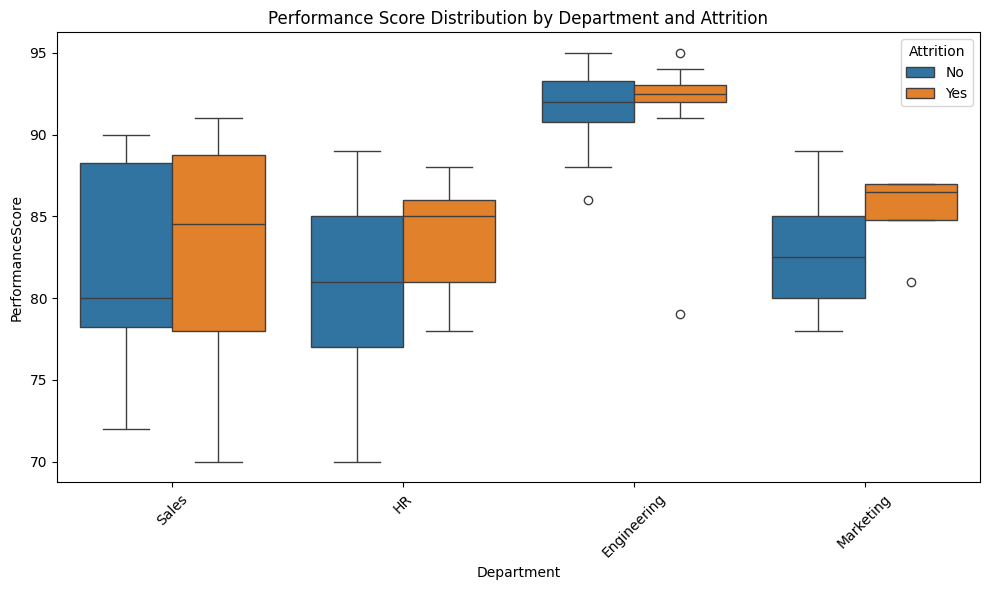

In [7]:
# Performance score distribution by departmemt and attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Department", y="PerformanceScore", hue="Attrition")
plt.title("Performance Score Distribution by Department and Attrition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


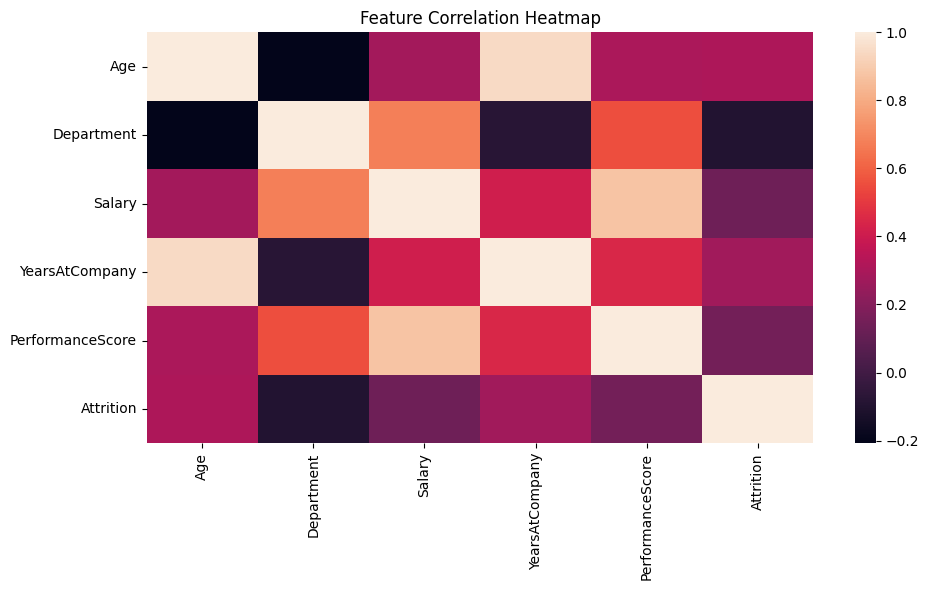

In [10]:
# heatmap
plt.figure(figsize=(10, 6))
corr = df.drop(columns=["EmployeeID", "Name"]).copy()
corr['Attrition'] = corr['Attrition'].map({'Yes': 1, 'No': 0})
corr['Department'] = corr['Department'].map({'Sales': 0, 'HR': 1,'Marketing' :2,'Engineering' :3})
sns.heatmap(corr.corr())
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
